In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.model_selection import GridSearchCV
plt.style.use('bmh')
data = pd.read_csv('C:/Users/Ed Liu/Desktop/DataViz-Project-2023/DataViz-Project-2023/Raw_Wrangling/ED_Wrangling_Result.csv')
data

,HADM_ID,SUBJECT_ID,DIAGNOSIS,WR_DIAGNOSIS,Hematocrit,Hematocrit_ab,Potassium,Potassium_ab,Sodium,Sodium_ab,...,Bicarbonate,Bicarbonate_ab,Urea Nitrogen,Urea Nitrogen_ab,Anion Gap,Anion Gap_ab,Platelet Count,Platelet Count_ab,Glucose,Glucose_ab
0,165315,22,BENZODIAZEPINE OVERDOSE,Other,35.9,True,4.4,False,140,False,...,28,False,17,False,13.0,False,259,False,102,False
1,152223,23,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,Other,21.9,True,3.9,False,143,False,...,23,False,14,False,12.0,False,95,True,128,True
2,124321,23,BRAIN MASS,Other,38.9,True,4.2,False,140,False,...,27,False,16,False,13.0,False,216,False,141,True
3,161859,24,INTERIOR MYOCARDIAL INFARCTION,Other,40.4,False,4.1,False,139,False,...,24,False,13,False,14.0,False,215,False,100,False
4,129635,25,ACUTE CORONARY SYNDROME,Other,37.9,True,3.3,False,134,False,...,23,False,50,True,19.0,False,269,False,378,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57214,191113,98800,TRAUMA,Other,43.8,False,3.3,False,142,False,...,15,True,9,False,6.0,True,241,False,64,True
57215,101071,98802,SAH,Other,42.2,False,NaN,NaN,NaN,NaN,...,NaN,NaN,20,False,NaN,NaN,271,False,NaN,NaN
57216,122631,98805,RENAL CANCER/SDA,Other,40.5,False,5.6,True,137,False,...,23,False,21,True,15.0,False,273,False,131,True
57217,170407,98813,S/P FALL,Other,29.3,True,3.9,False,144,False,...,23,False,5,True,14.0,False,272,False,148,True


# STEP 1: Missing values analysis

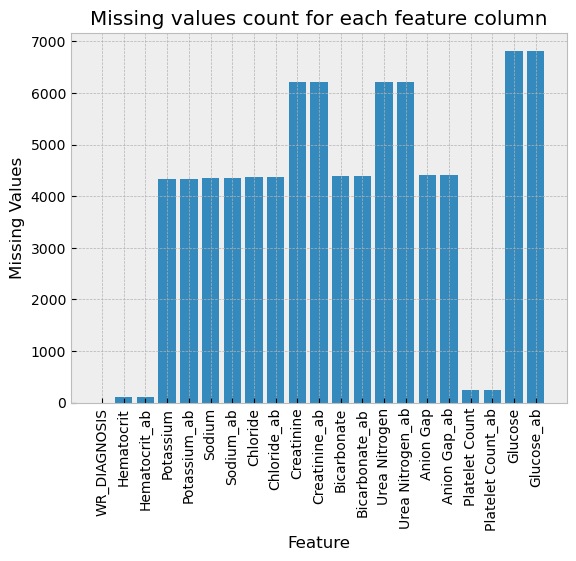

In [2]:
temp_list = []
for col in data.columns[3:]:
    temp_list.append(data[col].isna().sum())
plt.bar(data.columns[3:],temp_list)
plt.title("Missing values count for each feature column")
plt.xlabel("Feature")
plt.ylabel("Missing Values")
plt.xticks(rotation=90)
plt.show()

### We can see it is good that the outcome "WR_DIAGNOSIS" has no missing value, but there are still a number of missing values in other columns. Through their pattern, we can see that all missing values count has more than one other columns that share a similar height, so perhaps the missing values concentrate in the same rows? 

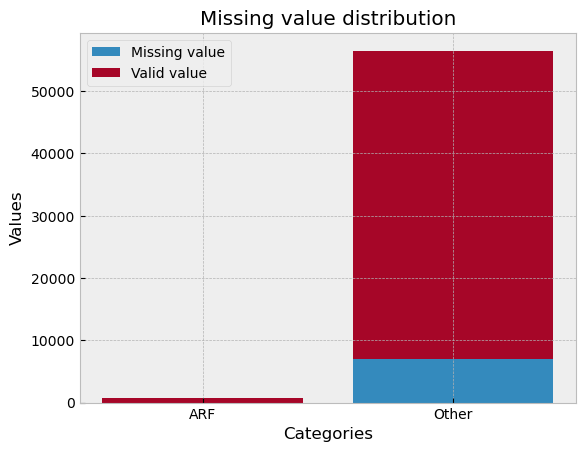

In [3]:
temp_df = data[data.isna().any(axis=1)]
temp_df_0 = data[~data.isna().any(axis=1)]

temp_value = [len(temp_df[temp_df['WR_DIAGNOSIS']=='ARF']),len(temp_df[temp_df['WR_DIAGNOSIS']=='Other'])]
plt.bar(['ARF','Other'], temp_value, label='Missing value')
plt.bar(['ARF','Other'], [len(temp_df_0[temp_df_0['WR_DIAGNOSIS']=='ARF']),len(temp_df_0[temp_df_0['WR_DIAGNOSIS']=='Other'])], bottom=temp_value, label='Valid value')

plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Missing value distribution')
plt.legend()
plt.show()

### We can see that the columns that have missing values mainly locate in the control group. Dropping them should not do too much harm, considering the ammount of data in the control group.

In [4]:
#Replace bool with 1/0
#Replace outcome with 1"ARF"/0"Other"
for i in range(0,10):
    data.iloc[:, 4+2*i] = pd.to_numeric(data.iloc[:, 4+2*i], errors='coerce')
data.dropna(inplace = True)
data.replace(True, 1, inplace=True)
data.replace(False, 0, inplace=True)
data.replace('Other', 0, inplace=True)
data.replace('ARF', 1, inplace=True)
data.drop(columns=['HADM_ID','SUBJECT_ID', 'DIAGNOSIS'],inplace=True)
data['Outcome'] = data.pop('WR_DIAGNOSIS')
data

,Hematocrit,Hematocrit_ab,Potassium,Potassium_ab,Sodium,Sodium_ab,Chloride,Chloride_ab,Creatinine,Creatinine_ab,...,Bicarbonate_ab,Urea Nitrogen,Urea Nitrogen_ab,Anion Gap,Anion Gap_ab,Platelet Count,Platelet Count_ab,Glucose,Glucose_ab,Outcome
0,35.9,1,4.4,0,140.0,0,103.0,0,0.6,0,...,0,17.0,0,13.0,0,259.0,0,102.0,0,0
1,21.9,1,3.9,0,143.0,0,112.0,1,0.7,0,...,0,14.0,0,12.0,0,95.0,1,128.0,1,0
2,38.9,1,4.2,0,140.0,0,104.0,0,0.7,0,...,0,16.0,0,13.0,0,216.0,0,141.0,1,0
3,40.4,0,4.1,0,139.0,0,105.0,0,0.9,0,...,0,13.0,0,14.0,0,215.0,0,100.0,0,0
4,37.9,1,3.3,0,134.0,0,95.0,1,1.6,1,...,0,50.0,1,19.0,0,269.0,0,378.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57213,29.5,1,4.5,0,149.0,1,109.0,1,0.7,0,...,0,15.0,0,16.0,0,184.0,0,158.0,1,0
57214,43.8,0,3.3,0,142.0,0,124.0,1,0.6,0,...,1,9.0,0,6.0,1,241.0,0,64.0,1,0
57216,40.5,0,5.6,1,137.0,0,105.0,0,1.3,1,...,0,21.0,1,15.0,0,273.0,0,131.0,1,0
57217,29.3,1,3.9,0,144.0,0,111.0,1,0.6,0,...,0,5.0,1,14.0,0,272.0,0,148.0,1,0


In [5]:
#Make sure all nan are gone
data.dtypes

Hematocrit           float64
Hematocrit_ab          int64
Potassium            float64
Potassium_ab           int64
Sodium               float64
Sodium_ab              int64
Chloride             float64
Chloride_ab            int64
Creatinine           float64
Creatinine_ab          int64
Bicarbonate          float64
Bicarbonate_ab         int64
Urea Nitrogen        float64
Urea Nitrogen_ab       int64
Anion Gap            float64
Anion Gap_ab           int64
Platelet Count       float64
Platelet Count_ab      int64
Glucose              float64
Glucose_ab             int64
Outcome                int64
dtype: object

# STEP 2: Outcome analysis
### From the last step we are already hinted that the control and the case group are highly imbalanced.

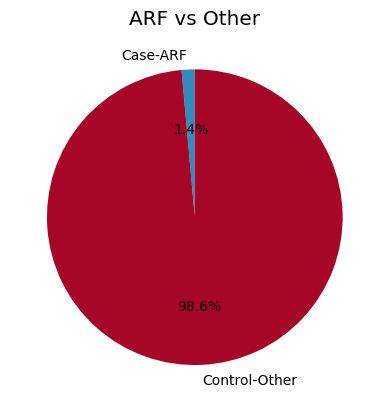

In [6]:
plt.pie([data['Outcome'].value_counts()[1] , data['Outcome'].value_counts()[0]], labels=['Case-ARF','Control-Other'], autopct='%1.1f%%', startangle=90)
plt.title('ARF vs Other')
plt.show()

### In terms of machine learning, we may need to do some more work on this. But for visualization, this should not hurt too much if we keep this in mind and perhaps be careful when adjusting the channels for them.

# STEP 3: Correlation analysis

<Axes: >

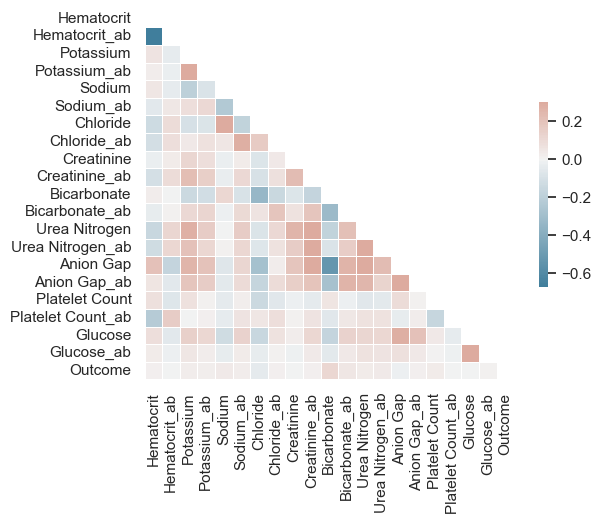

In [7]:
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html
sns.set_theme(style="white")
mask = np.triu(np.ones_like(data.corr(), dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(data.corr(), mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

### We can see that most features do not have a strong correlation with others, except for value-'whether value is abnormal' pairs and Anion Gap - Bicarbonate. We are not doing anything to that yet, but we should keep them in mind.

# STEP 4: Visualization exploration

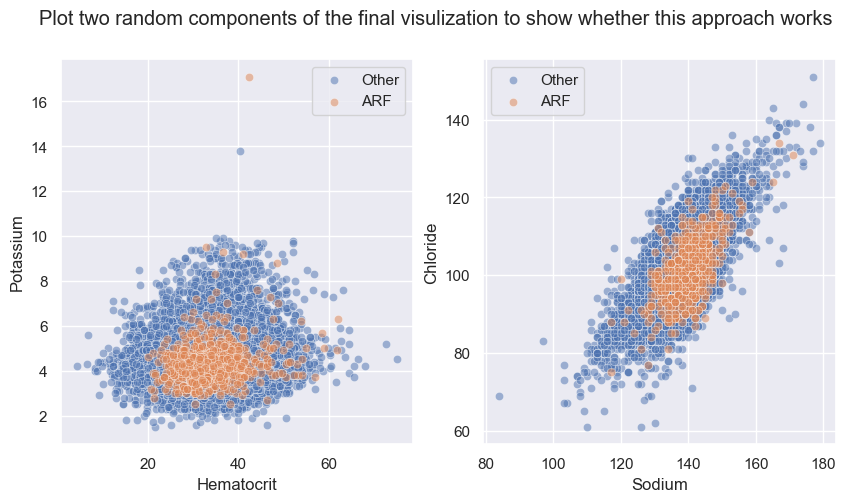

In [8]:
sns.set_theme()
fig, axes = plt.subplots(1, 2, figsize=(10,5))
sns.scatterplot( x="Hematocrit", y="Potassium", data=data[data['Outcome'] == 0], legend=True, ax = axes[0], alpha =0.5, label="Other")
sns.scatterplot( x="Hematocrit", y="Potassium", data=data[data['Outcome'] == 1], legend=True, ax = axes[0], alpha =0.5, label="ARF")
axes[0].legend()

sns.scatterplot( x="Sodium", y="Chloride", data=data[data['Outcome'] == 0], legend=True, ax = axes[1], alpha =0.5, label="Other")
sns.scatterplot( x="Sodium", y="Chloride", data=data[data['Outcome'] == 1], legend=True, ax = axes[1], alpha =0.5, label="ARF")
axes[1].legend()

fig.suptitle('Plot two random components of the final visulization to show whether this approach works')
plt.show()

# STEP 5: Dimension reduction exploration
### One thought is at the basis of letting users to select what feature to be used as x and y, perhaps it will be cool if we can let them select mutiple features and then reduce the dimensionality to 2.

In [9]:
temp_list = []
for i in range(0,10):
    temp_list.append(data.columns[2*i])
temp_data = data[temp_list]
temp_data.reset_index(inplace=True)

In [10]:
tsne = TSNE(n_components=2, learning_rate='auto', perplexity=30, init='random')
transformed = tsne.fit_transform(temp_data)

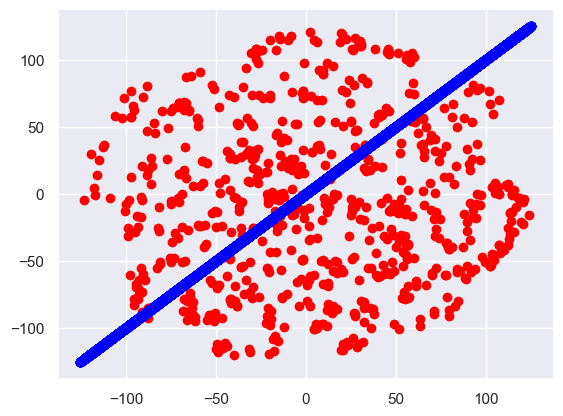

In [11]:
figure,ax = plt.subplots()
ax.scatter(transformed[data['Outcome']==1][:,0], transformed[data['Outcome']==1][:,1],color='red')
ax.scatter(transformed[data['Outcome']==0][:,0], transformed[data['Outcome']==0][:,0],color='blue')

### The processing takes a while and the results still need perfection. We may implement this, but still need more consideration.